# Handwritten Digits Recognition using Neural networks and CNN

## Artificial Neural Network

Artificial neural networks (ANNs), usually simply called neural networks (NNs), are computing systems inspired by the biological neural networks that constitute animal brains. An ANN is based on a collection of connected units or nodes called artificial neurons, which loosely model the neurons in a biological brain.

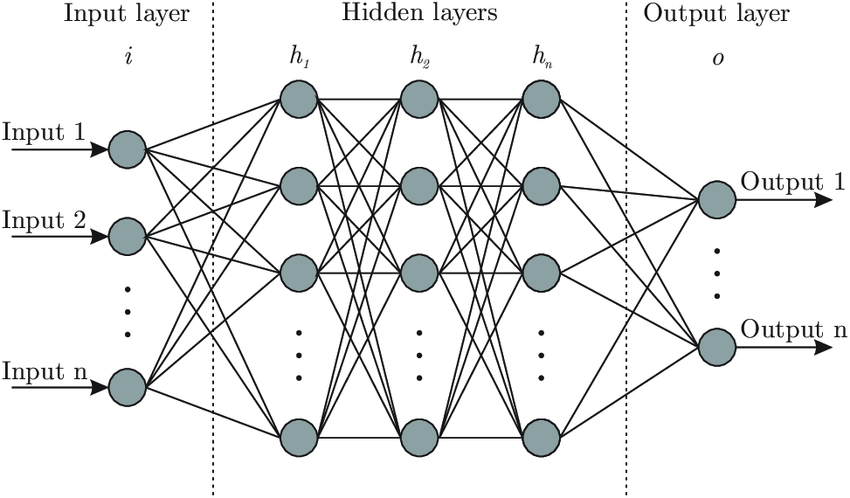

Artificial neural networks (ANNs) are comprised of a node layers, containing an input layer, one or more hidden layers, and an output layer. Each node, or artificial neuron, connects to another and has an associated weight and threshold. If the output of any individual node is above the specified threshold value, that node is activated, sending data to the next layer of the network. Otherwise, no data is passed along to the next layer of the network.


Neural networks rely on training data to learn and improve their accuracy over time. However, once these learning algorithms are fine-tuned for accuracy, they are powerful tools in computer science and artificial intelligence, allowing us to classify and cluster data at a high velocity. Tasks in speech recognition or image recognition can take minutes versus hours when compared to the manual identification by human experts. One of the most well-known neural networks is Google’s search algorithm.

### Importing Required Libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.datasets import mnist

### Loading Dataset

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
print("Shape of Training Dataset: ",x_train.shape)
print("Shape of Testing Dataset: ",x_test.shape)

Shape of Training Dataset:  (60000, 28, 28)
Shape of Testing Dataset:  (10000, 28, 28)


### Visualizing Training Set

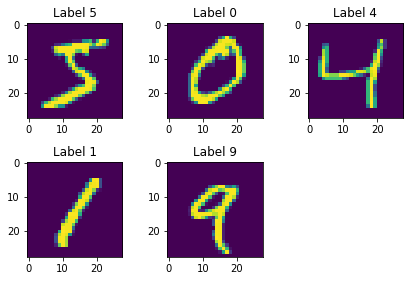

In [6]:
for i in range(5):
    plt.subplot(2,3,i+1)
    plt.imshow(x_train[i])
    plt.title("Label {}".format(y_train[i]))
plt.tight_layout()

### Preprocessing and Model Building

#### Normalizing Dataset 

In [7]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

#### Model Building

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28, 1)),
    tf.keras.layers.Dense(128, activation = tf.nn.relu),
    tf.keras.layers.Dense(64, activation = tf.nn.relu),
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

In [9]:
model.compile(optimizer = 'adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics = ['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.fit(x_train, y_train, batch_size = 128, epochs = 50, verbose = 1)

Epoch 1/50
469/469 [==============================] - 3s 4ms/step - loss: 1.6008 - accuracy: 0.8854
Epoch 2/50
469/469 [==============================] - 2s 3ms/step - loss: 1.5215 - accuracy: 0.9447
Epoch 3/50
469/469 [==============================] - 1s 3ms/step - loss: 1.5080 - accuracy: 0.9569
Epoch 4/50
469/469 [==============================] - 1s 2ms/step - loss: 1.5000 - accuracy: 0.9644
Epoch 5/50
469/469 [==============================] - 1s 2ms/step - loss: 1.4951 - accuracy: 0.9684
Epoch 6/50
469/469 [==============================] - 1s 2ms/step - loss: 1.4903 - accuracy: 0.9734: 0s - loss: 1.4901 - ac
Epoch 7/50
469/469 [==============================] - 1s 2ms/step - loss: 1.4876 - accuracy: 0.9753
Epoch 8/50
469/469 [==============================] - 1s 2ms/step - loss: 1.4837 - accuracy: 0.9793: 0s - loss: 1.4832 - accuracy:  - ETA: 0s - loss: 1.4832 - accura
Epoch 9/50
469/469 [==============================] - 1s 2ms/step - loss: 1.4825 - accuracy: 0.9803
Epoch 10/5

### Evaluating Testing Dataset

In [12]:
score = model.evaluate(x_test,y_test)
print('Test score: ', score[0])
print('Test accuracy: ', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 1.4886 - accuracy: 0.9728
Test score:  1.4886305332183838
Test accuracy:  0.9728000164031982


## Convolutional Neural Networks

### Loading Dataset

In [131]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [132]:
print("training dataset shape: ", x_train.shape)
print("testing dataset shape: ", x_test.shape)

training dataset shape:  (60000, 28, 28)
testing dataset shape:  (10000, 28, 28)


### Normalizing Dataset 

In [133]:
x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28,28,1)

In [134]:
x_train = x_train / 255
x_test = x_test / 255

#### CNN Model Building

In [135]:
cnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [137]:
cnn_model.compile(optimizer='adam',
                 loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 metrics=['accuracy'])

In [138]:
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 32)          18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 32)               

In [139]:
cnn_model.fit(x_train, y_train, batch_size = 128, epochs = 50, verbose = 1)

Epoch 1/50


C:\Users\hiren\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\backend.py:4929: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


469/469 [==============================] - 32s 60ms/step - loss: 0.4102 - accuracy: 0.8714
Epoch 2/50
469/469 [==============================] - 29s 61ms/step - loss: 0.1117 - accuracy: 0.9657
Epoch 3/50
469/469 [==============================] - 28s 60ms/step - loss: 0.0846 - accuracy: 0.9739
Epoch 4/50
469/469 [==============================] - 28s 61ms/step - loss: 0.0686 - accuracy: 0.9790
Epoch 5/50
469/469 [==============================] - 28s 60ms/step - loss: 0.0572 - accuracy: 0.9828
Epoch 6/50
469/469 [==============================] - 29s 62ms/step - loss: 0.0495 - accuracy: 0.9848
Epoch 7/50
469/469 [==============================] - 29s 61ms/step - loss: 0.0434 - accuracy: 0.9867
Epoch 8/50
469/469 [==============================] - 28s 61ms/step - loss: 0.0395 - accuracy: 0.9872
Epoch 9/50
469/469 [==============================] - 29s 61ms/step - loss: 0.0358 - accuracy: 0.9882
Epoch 10/50
469/469 [==============================] - 28s 60ms/step - loss: 0.0309 - accurac

#### Evaluating Test Dataset

In [140]:
score = cnn_model.evaluate(x_test,y_test)
print('Test score: ', score[0])
print('Test accuracy: ', score[1])

313/313 [==============================] - 2s 6ms/step - loss: 0.0836 - accuracy: 0.9872
Test score:  0.0836108848452568
Test accuracy:  0.9872000217437744


In [143]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

NameError: name 'mnist' is not defined

In [155]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [152]:
image_gen = ImageDataGenerator(rescale=1/255, horizontal_flip=True)
x_train = x_train.reshape(60000,28,28,1)
train_gen = image_gen.flow(x_train, y_train, batch_size=32)

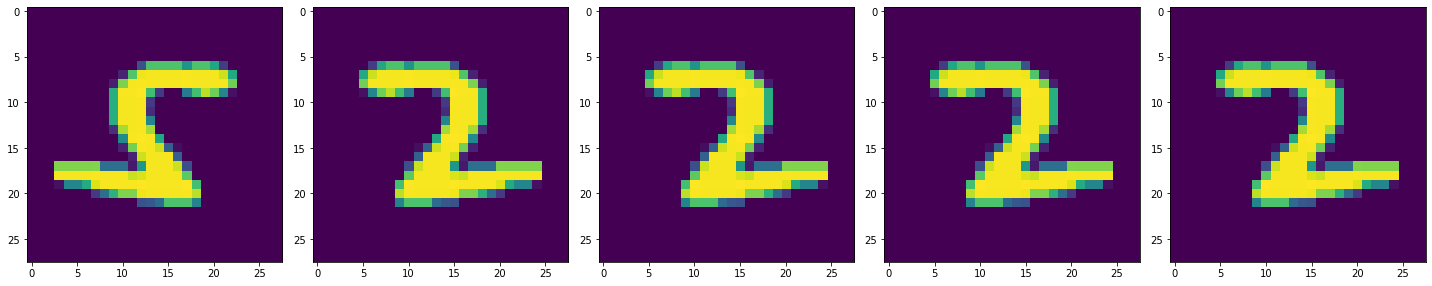

In [156]:
augmented_images = [train_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [157]:
image_gen = ImageDataGenerator(rescale=1/255, rotation_range=45)
x_train = x_train.reshape(60000,28,28,1)
train_gen = image_gen.flow(x_train, y_train, batch_size=32)

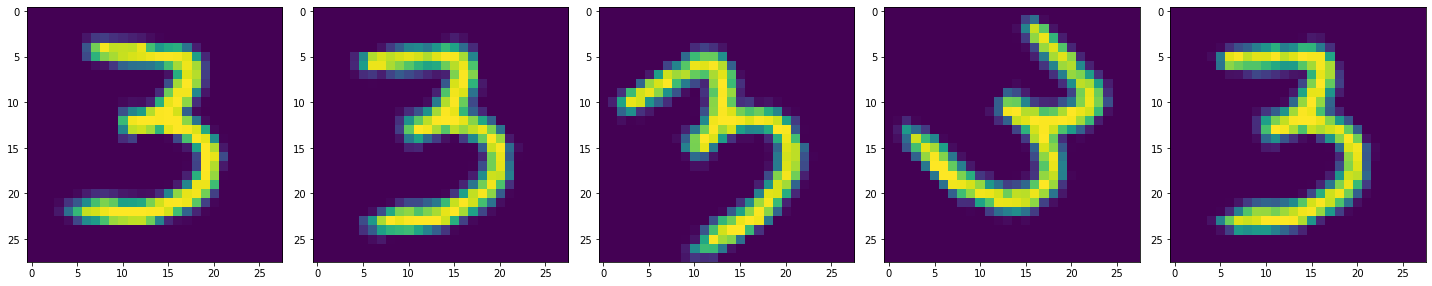

In [158]:
augmented_images = [train_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [159]:
image_gen = ImageDataGenerator(rescale=1/255, zoom_range=0.8)
x_train = x_train.reshape(60000,28,28,1)
train_gen = image_gen.flow(x_train, y_train, batch_size=32)

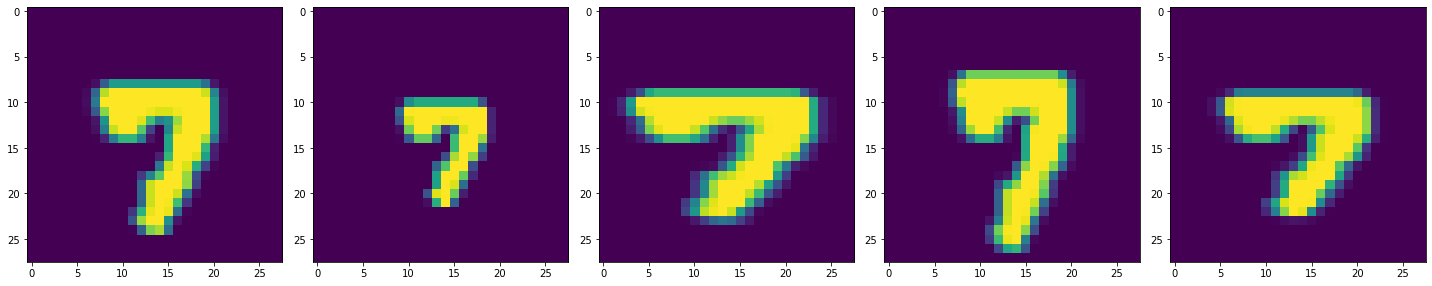

In [160]:
augmented_images = [train_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [171]:
image_gen = ImageDataGenerator(rescale=1/255, 
                                #zoom_range=0.8,
                                horizontal_flip=True,
                                rotation_range=45,
                                fill_mode='nearest')
x_train = x_train.reshape(60000,28,28,1)
train_gen = image_gen.flow(x_train, y_train, batch_size=32)

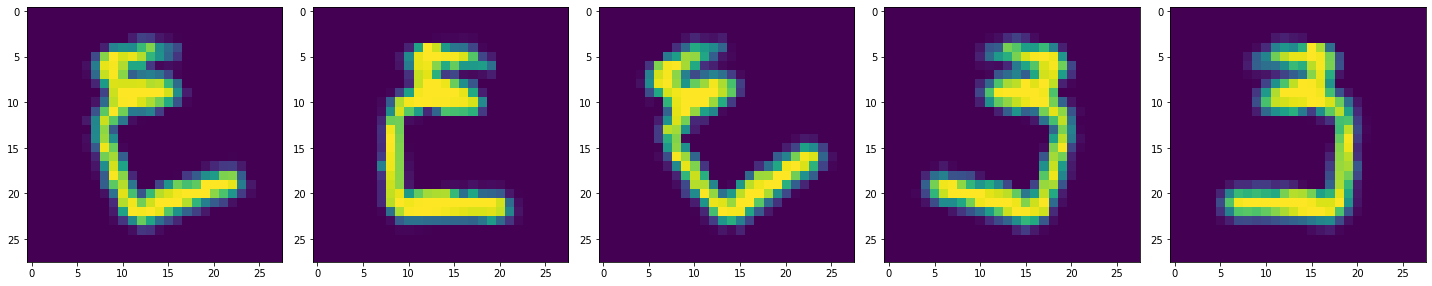

In [172]:
augmented_images = [train_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [173]:
aug_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [174]:
aug_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [175]:
aug_model.fit(train_gen, batch_size=128, epochs=100)

Epoch 1/100
1875/1875 [==============================] - 38s 20ms/step - loss: 0.7139 - accuracy: 0.7649
Epoch 2/100
1875/1875 [==============================] - 37s 20ms/step - loss: 0.3286 - accuracy: 0.8961
Epoch 3/100
1875/1875 [==============================] - 38s 20ms/step - loss: 0.2447 - accuracy: 0.9225
Epoch 4/100
1875/1875 [==============================] - 37s 20ms/step - loss: 0.2025 - accuracy: 0.9364
Epoch 5/100
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1819 - accuracy: 0.9426
Epoch 6/100
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1612 - accuracy: 0.9489
Epoch 7/100
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1510 - accuracy: 0.9531
Epoch 8/100
1875/1875 [==============================] - 36s 19ms/step - loss: 0.1420 - accuracy: 0.9554
Epoch 9/100
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1335 - accuracy: 0.9583
Epoch 10/100
1875/1875 [==============================]

In [1]:
x_test = x_test.reshape(10000,28,28,1)
x_test = x_test/255
score = aug_model.evaluate(x_test,y_test)
print('Test score: ', score[0])
print('Test accuracy: ', score[1])

NameError: name 'x_test' is not defined